In [124]:
pip install TPOT

     |████████████████████████████████| 87 kB 4.2 MB/s 
     |████████████████████████████████| 160 kB 16.6 MB/s 
     |████████████████████████████████| 173.5 MB 63 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=d28745e4e4ca7ef823ece08e91d508ce42ed2f16e515f9c793ab8a85b6d9ff9b
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [72]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation
import pandas as pd

import matplotlib.pyplot as plt

In [73]:
# Basic processing of dataframe
df = pd.read_csv("data.csv")
columns = list(df.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'Class' )
df.columns = columns
df = df.set_index("ID")

Class = df.Class
df = df.drop(['Class'], axis = 1)

# df

In [74]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [75]:
X=df.values

In [76]:
X=X[:,1:-1]

In [77]:
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS = ['Depression',
          'Alzheimer',
          'Sleep Disorder',
          'Epilepsy',
          'Schizophrenia']
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments

keras version  2.6.0


In [78]:
# Obtaining information of basic descriptors
description = {}
for index, row in df.iterrows():
    description[index] = [np.mean(row), np.std(row), min(row), np.quantile(row,0.25),
                          np.median(row), np.quantile(row,0.75), max(row)]
descriptors = ['Mean','Standard Deviation','Min','Q1','Median','Q3','Max']

description_df = pd.DataFrame(description).transpose()
description_df.columns = descriptors
description_df = pd.concat([description_df,Class], axis=1)
# description_df

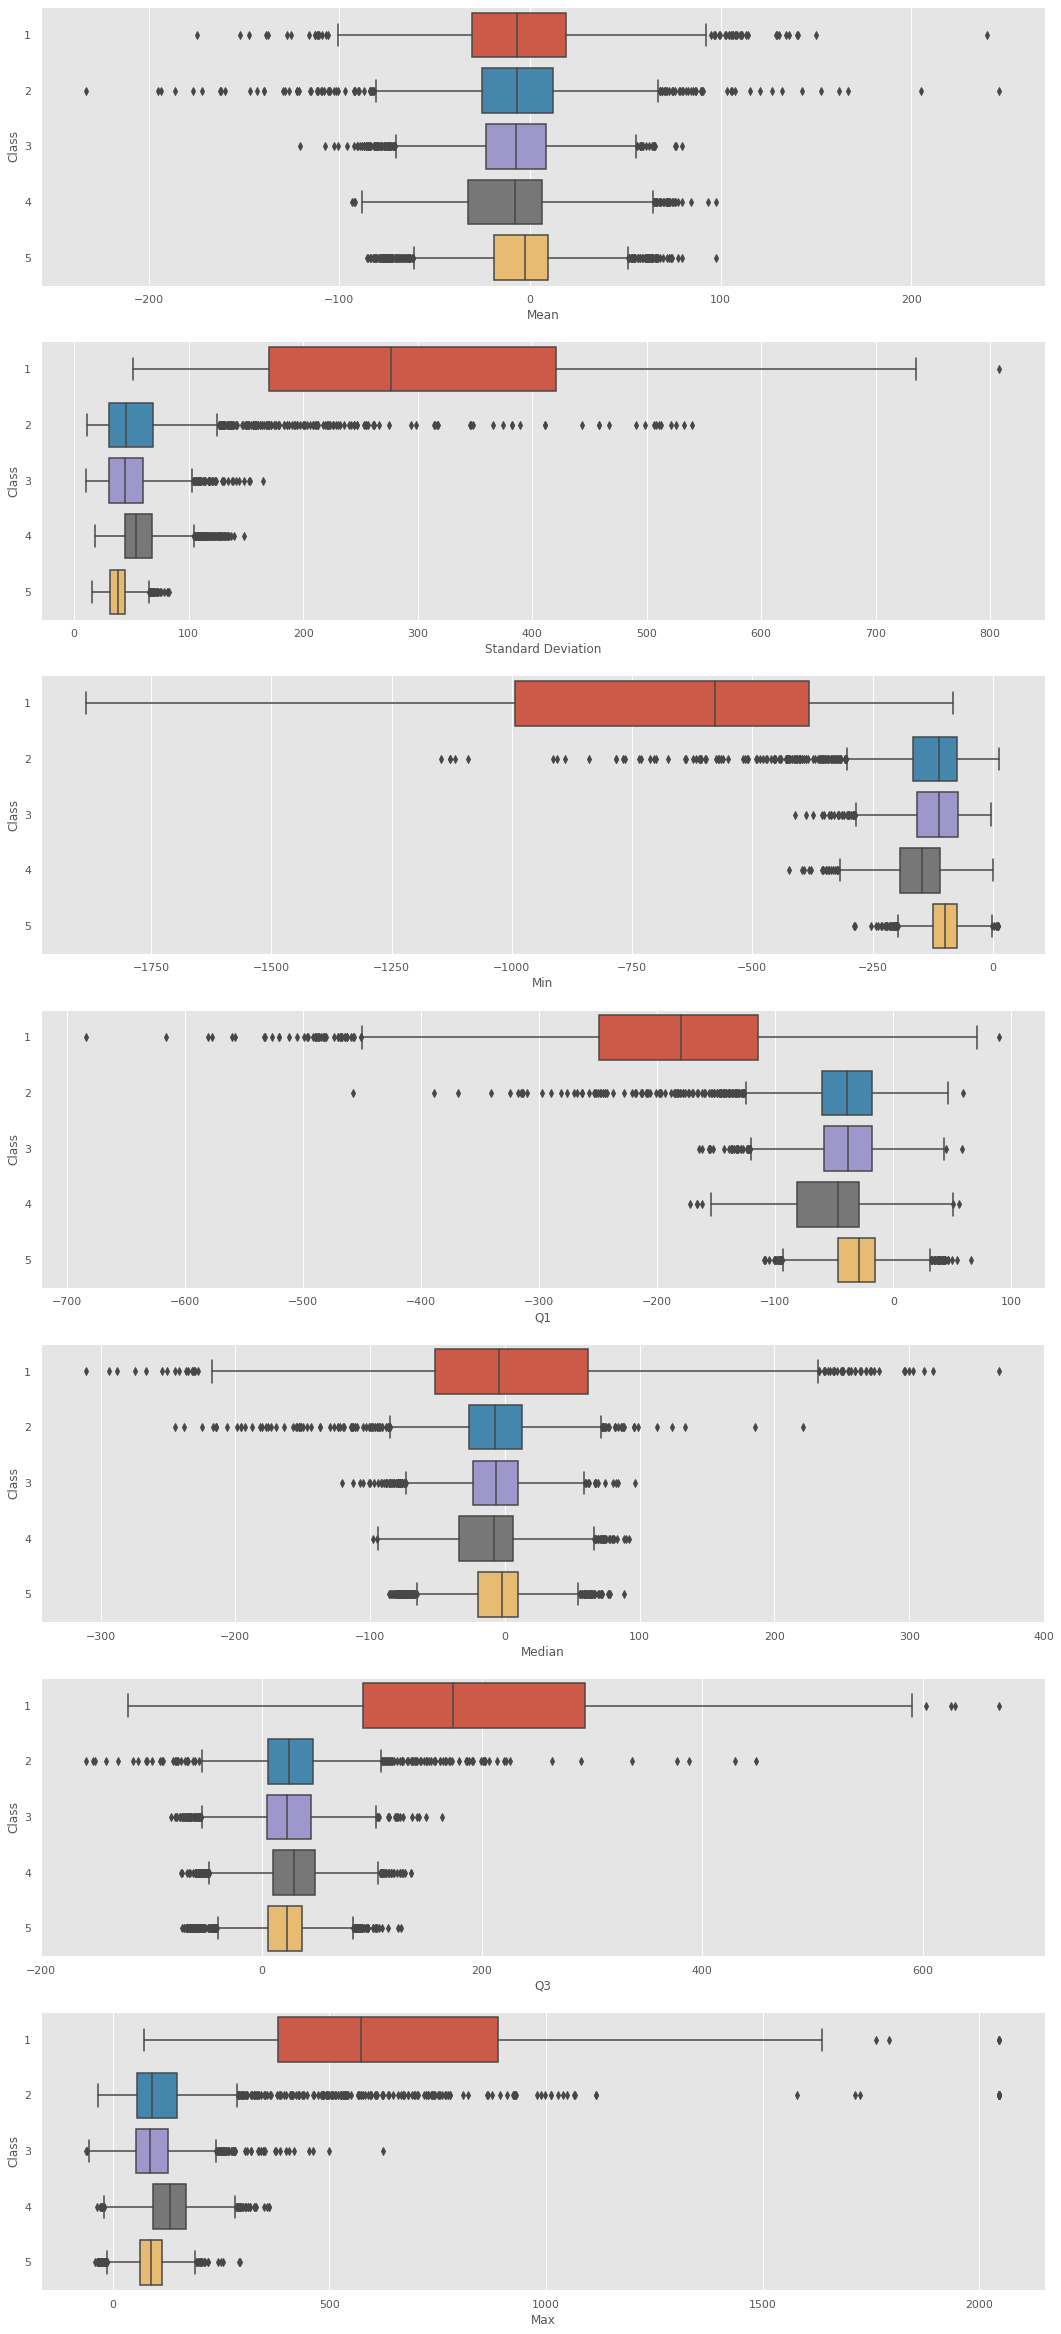

In [8]:
#Plotting basic descriptors against the classes
f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in descriptors:
    sb.boxplot(x = var, y = "Class", data = description_df, orient = "h", ax = axes[count])
    count += 1

In [9]:
df = pd.read_csv (r'data.csv')
patient_ID = [df['Unnamed: 0'][i] for i in range(len(df))]
time_data = [None for i in range(len(df))]
for i in range(len(patient_ID)):
    position_V = patient_ID[i].index('V')
    time_data[i] = int(patient_ID[i][1:position_V-1])
    patient_ID[i] = patient_ID[i][position_V+1:]
    patient_ID[i] = patient_ID[i].replace('.','0')
    patient_ID[i] = int(patient_ID[i])

df.insert(1, 'ID', patient_ID)
df.insert(0, 'Time', time_data)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.sort_values(["y","ID","Time"])
df = df.set_index(['ID'])

In [10]:
print(df)

      Time    X1   X2   X3   X4   X5  ...  X174  X175  X176  X177  X178  y
ID                                    ...                                 
14       1   100  124  153  185  210  ...   356   308   253   180   115  1
14       2    30  -72 -177 -262 -293  ...   247   308   326   317   305  1
14       3   291  263  214  162  106  ...   160   -17  -534 -1007 -1316  1
14       4 -1172 -759 -255  137  358  ...   362   374   388   405   426  1
14       5   433  423  398  356  321  ...  -115    -9    90   164   221  1
...    ...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ... ..
1099    19     1  -10  -25  -44  -51  ...    43    57    61    23   -23  5
1099    20   -54  -38  -23   -1    4  ...   -64   -70   -64   -61   -39  5
1099    21   -31  -19  -26  -16  -22  ...    -2   -19   -40   -56   -70  5
1099    22   -80  -86  -75  -51  -33  ...   -31   -26   -20   -13     1  5
1099    23    -3  -19  -45  -66  -67  ...    39    57    44    41    14  5

[11500 rows x 180 column

In [11]:
ep=[]
for i in range(1,6):
    ep_1=df[df.y.isin([i])]
    ep.append(ep_1)

In [12]:
ep[1]

,Time,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,1,34,33,28,22,21,22,22,19,22,18,22,25,15,5,0,-8,-10,-19,-25,-39,-49,-50,-54,-54,-59,-63,-64,-58,-53,-39,-43,-37,-32,-24,-14,-1,12,18,24,...,33,45,49,55,55,54,44,38,38,46,50,57,52,43,40,45,57,59,66,61,58,52,48,38,39,40,39,30,18,19,20,20,22,17,19,19,23,18,19,2
13,2,12,2,-4,-13,0,-6,5,4,4,3,-4,-4,-16,-27,-37,-37,-40,-36,-26,-22,-15,-9,-5,-8,-5,-9,-3,9,19,21,22,28,38,41,53,57,63,59,54,...,51,54,61,55,52,36,35,27,29,30,39,51,53,55,54,57,53,50,49,51,54,52,50,47,59,67,76,78,84,88,93,91,87,76,67,64,57,49,47,2
13,3,48,49,53,59,67,73,78,72,63,57,57,58,52,50,48,51,58,62,67,68,68,68,71,69,73,65,69,70,72,75,71,68,57,44,39,39,34,36,32,...,-13,-17,-23,-23,-26,-19,-14,-6,-3,-3,2,-8,-9,-13,-9,-9,-7,-7,-11,-10,-7,-6,-11,-7,-12,-4,1,9,16,13,15,10,-1,-8,-8,-5,7,11,13,2
13,4,12,9,21,26,22,24,16,19,18,16,8,2,-2,-5,-7,-11,-8,-10,-14,-14,-19,-16,-10,-1,-1,-11,-11,-23,-29,-27,-26,-21,-10,-2,4,7,7,11,9,...,-2,2,13,23,31,33,25,25,28,39,45,45,35,38,36,41,51,52,61,67,72,71,67,59,51,53,54,55,55,57,59,59,59,64,74,77,72,60,42,2
13,5,35,41,56,70,82,91,101,104,112,115,106,109,101,92,91,87,86,90,94,99,100,100,105,107,99,98,86,87,80,88,85,85,87,76,70,66,67,72,64,...,24,14,9,4,9,6,2,2,1,2,1,9,10,8,4,6,8,9,16,20,29,33,35,37,35,40,45,50,47,39,28,20,20,15,13,10,13,1,-11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,19,-73,-75,-80,-85,-87,-85,-82,-82,-80,-81,-80,-84,-86,-91,-85,-79,-77,-75,-71,-73,-77,-86,-93,-101,-108,-115,-111,-100,-86,-76,-74,-73,-68,-63,-51,-41,-36,-28,-26,...,-55,-51,-43,-40,-35,-30,-36,-42,-42,-42,-40,-41,-37,-36,-35,-21,-16,-7,-1,-1,10,20,29,35,35,31,35,39,45,39,35,25,21,20,8,0,-11,-12,-16,2
10993,20,-13,-20,-18,-15,-13,-14,-16,-27,-35,-42,-39,-43,-46,-51,-54,-53,-51,-48,-40,-36,-28,-17,-10,1,0,4,0,3,6,-5,-22,-33,-46,-47,-52,-56,-60,-66,-64,...,-3,-3,-7,-3,5,-3,-4,2,2,1,-4,1,-1,4,3,-2,-15,-23,-20,-22,-42,-45,-49,-64,-73,-78,-80,-79,-76,-75,-76,-75,-73,-66,-71,-72,-75,-79,-77,2
10993,21,-68,-56,-43,-29,-27,-27,-23,-20,-29,-38,-31,-30,-23,-25,-29,-27,-33,-32,-36,-41,-48,-53,-57,-64,-66,-66,-59,-55,-49,-49,-39,-36,-41,-44,-51,-49,-50,-49,-48,...,-8,2,1,-2,-2,0,-3,-3,-8,-2,-10,-13,-13,-17,-7,-8,-7,-6,-4,-10,-13,-18,-15,-5,2,-8,-9,-21,-24,-29,-34,-39,-40,-44,-47,-42,-36,-23,-24,2


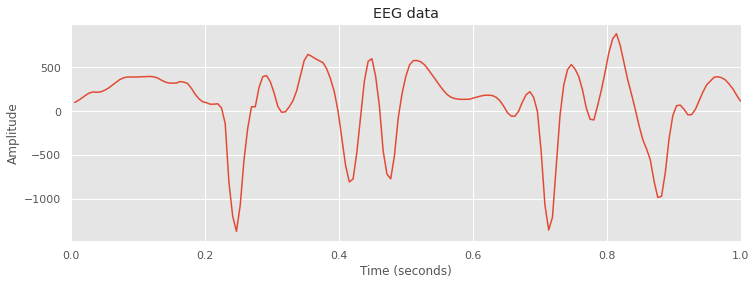

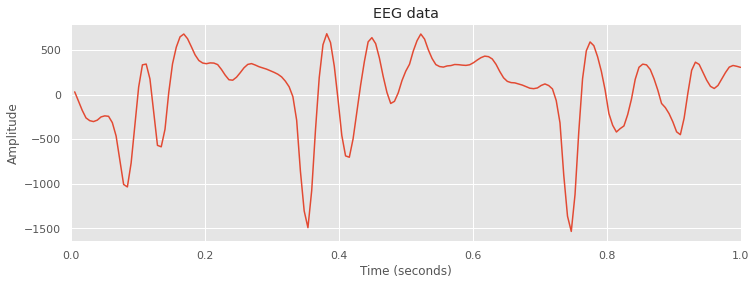

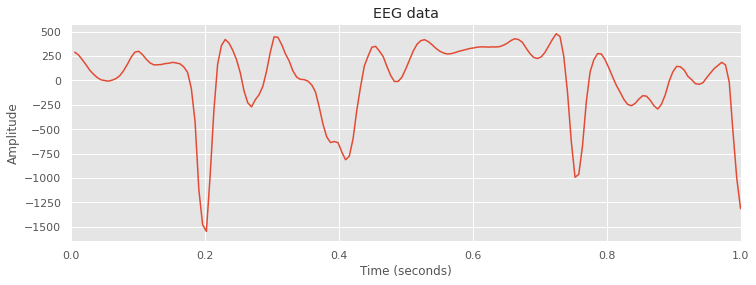

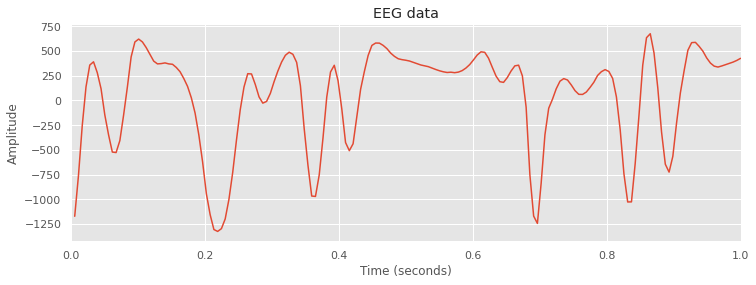

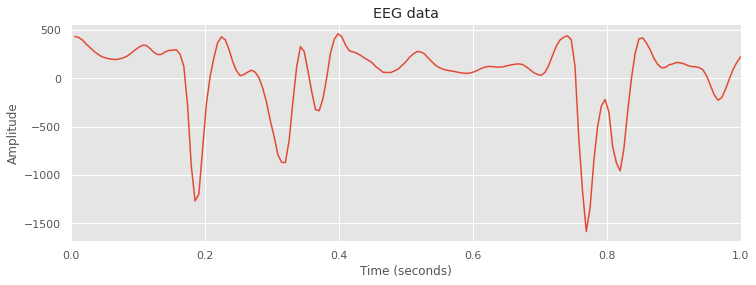

In [13]:
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

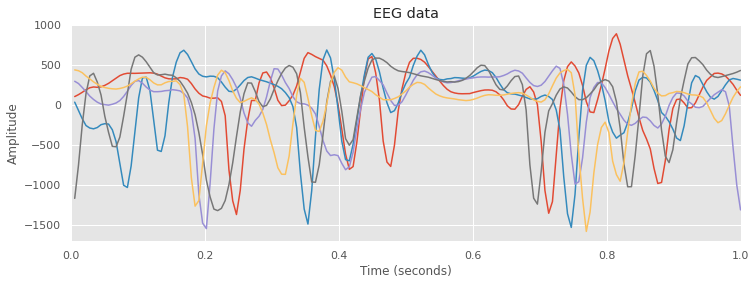

In [14]:
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 1])
plt.title('EEG data')

for i in range(0,5):
    
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    plt.plot(time, x)

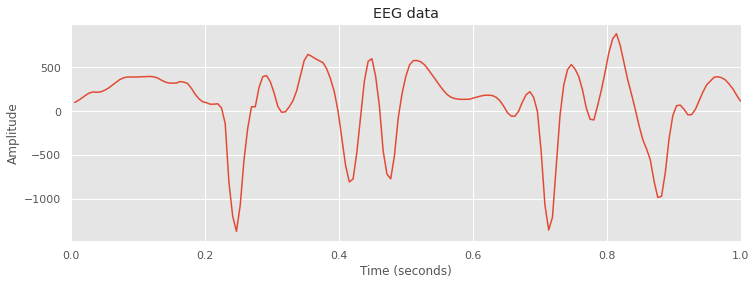

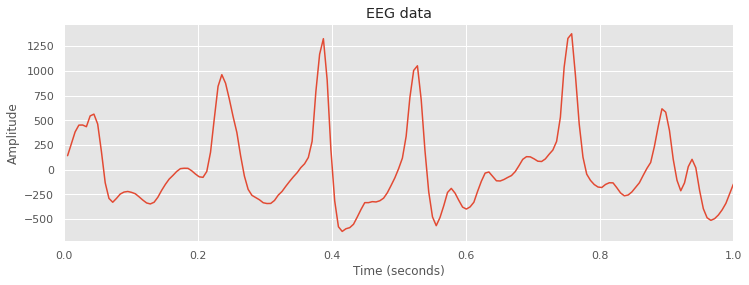

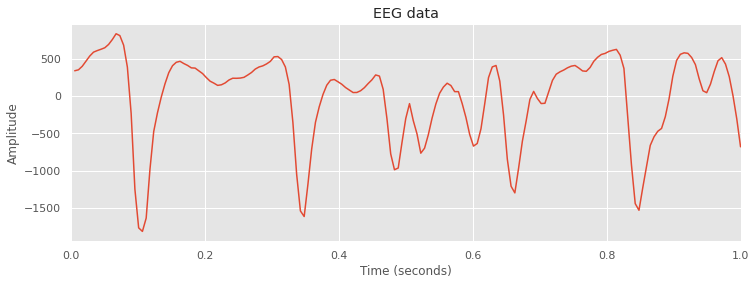

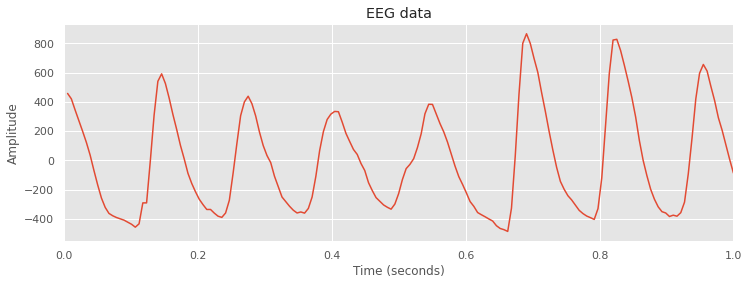

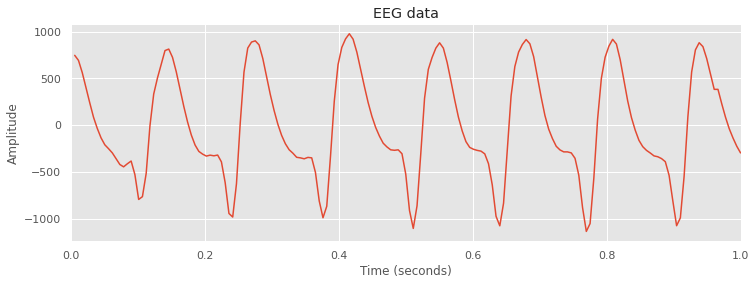

In [15]:
for i in range(0,115,23):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

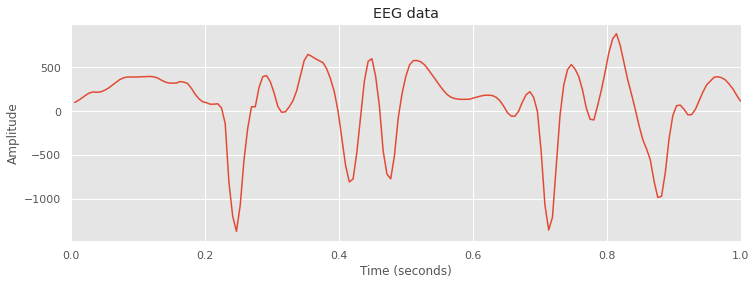

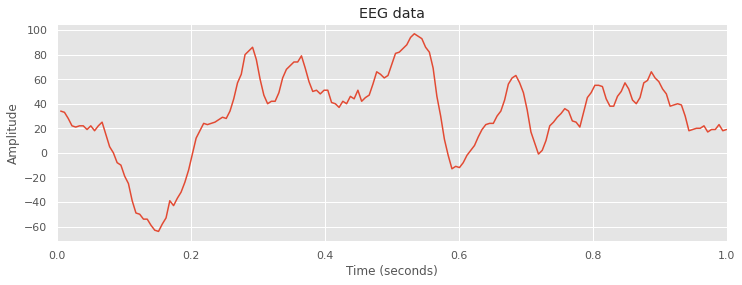

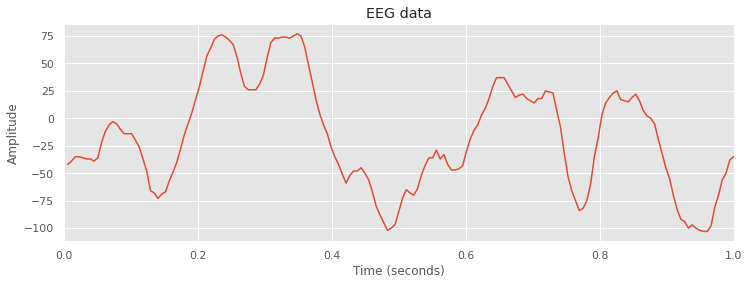

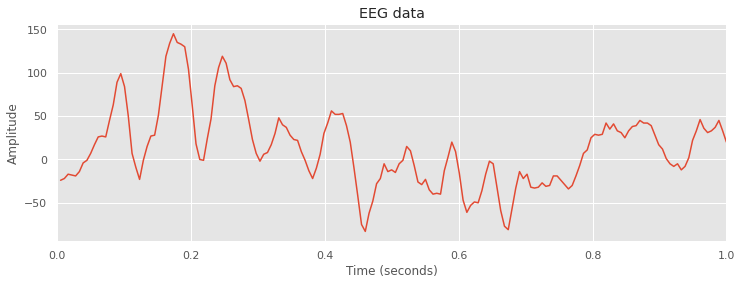

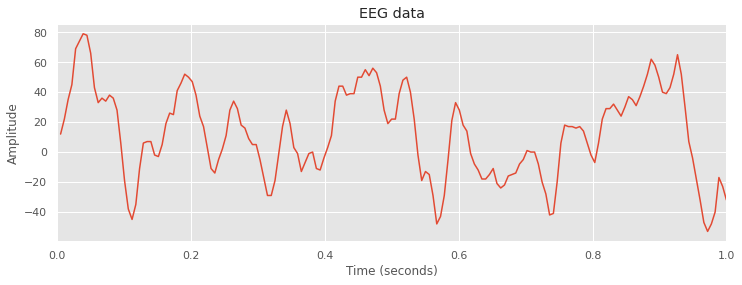

In [16]:
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[i].iloc[0][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

In [17]:
mean={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    mean["class{}".format(i+1)]=(std_1.mean())
mean

{'class1': 303.472483948053,
 'class2': 60.629722370011656,
 'class3': 47.78537578917578,
 'class4': 59.192105143026765,
 'class5': 38.5321940129388}

In [18]:
median={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    median["class{}".format(i+1)]=(std_1.median())
median

{'class1': 277.4137547180365,
 'class2': 45.86176792829684,
 'class3': 44.80547764151015,
 'class4': 54.47871039301483,
 'class5': 38.13346653970736}

In [19]:
std={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    std["class{}".format(i+1)]=(std_1.std())
std

{'class1': 153.077731141822,
 'class2': 57.67903775844884,
 'class3': 22.12837371544869,
 'class4': 21.15817161829366,
 'class5': 10.099196566344036}

In [20]:
df = pd.read_csv('data.csv')
df["Result"]=df.y==1
df["Result"]=df["Result"].astype(int)
df.pop("y")
df.drop(df.columns[0], axis=1, inplace=True)

In [21]:

from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df['Result']) 
X = df.drop(df.columns[178], axis=1, inplace=False)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.25)

In [22]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,...,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55


In [23]:
from keras.models import Sequential #sequential is required to initialise the neural network
from keras.layers import Dense      #dense is used to build the layers
from keras.layers import Dropout    #Dropout Layer in order to prevent Regularization in the network

In [24]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
classifier = Sequential()

In [26]:
model=Sequential()


model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               11776     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [27]:
classifier.add(Dense(48, input_dim = 561, kernel_initializer='uniform', activation='relu', ))

In [28]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.912927536231884

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9015652173913044

For Train Dataset
True Negatives= 6710
False Positives= 188
False Negatives= 563
True Positives= 1164

True Negative Rate = 0.9727457233980864
False Positive Rate = 0.0272542766019136
False Negative Rate = 0.3259988419224088
True Positive Rate = 0.6740011580775912

For Test Dataset
True Negatives= 2221
False Positives= 81
False Negatives= 202
True Positives= 371

True Negative Rate = 0.9648132059079062
False Positive Rate = 0.03518679409209383
False Negative Rate = 0.3525305410122164
True Positive Rate = 0.6474694589877836



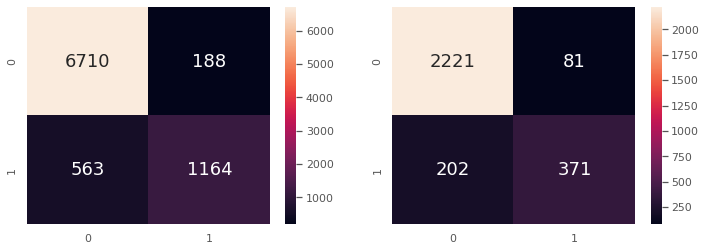

In [29]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("For Train Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))

tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("For Test Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))


tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9805217391304348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9610434782608696



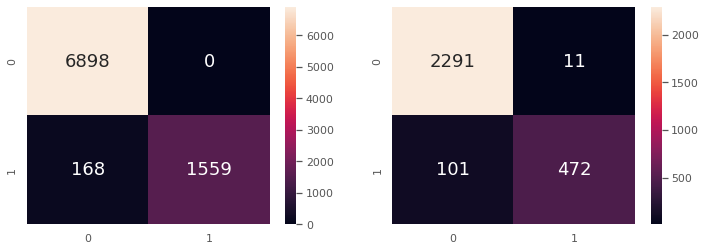

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [31]:
import pandas as pd
df = pd.read_csv("data.csv")

df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [32]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class: %.3f"
    % calc_prevalence(df["OUTPUT_LABEL"].values)
)

prevalence of the positive class: 0.200


In [33]:
print("# of Columns:", len(df.columns))

# of Columns: 179


In [34]:
collist = df.columns.tolist()
cols_input = collist[0:178]
df_data = df[cols_input + ["OUTPUT_LABEL"]]


In [35]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"

set()


In [36]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [37]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

In [38]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

In [39]:
df_valid_test = df_data.sample(frac=0.3)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)

df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [40]:
# check the prevalence of each
print(
    "Test prevalence(n = %d):%.3f"
    % (len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values))
)
print(
    "Valid prevalence(n = %d):%.3f"
    % (len(df_valid), calc_prevalence(df_valid.OUTPUT_LABEL.values))
)
print(
    "Train all prevalence(n = %d):%.3f"
    % (len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values))
)

Test prevalence(n = 1725):0.195
Valid prevalence(n = 1725):0.196
Train all prevalence(n = 8050):0.202


In [41]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 11500)


In [42]:
import numpy as np

rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)

df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 3250):0.500


In [43]:
# a function to fill missing values with mean of the column if needed
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [44]:
import pickle
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (8050, 178)
Training shapes: (3250, 178) (3250,)
Validation shapes: (1725, 178) (1725,)


In [47]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):

    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [50]:
thresh = 0.5

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 6, random_state = 69)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, \
rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, \
rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.998
accuracy:0.967
recall:0.946
precision:0.988
specificity:0.989
prevalence:0.500
 
Validation:
AUC:0.988
accuracy:0.956
recall:0.896
precision:0.881
specificity:0.970
prevalence:0.196
 


In [53]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [54]:
# this is a quick way to tune one parameter of your model while holding everything else constant.
import time

my_params =  np.arange(0.05, 1.01, 0.05) # fill this in your list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    
    # fit model
    model = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=my_param, min_samples_leaf=3, min_samples_split=20, n_estimators=100)
    model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

0.05 0.5039889812469482
0.1 0.6861214637756348
0.15000000000000002 0.8789334297180176
0.2 1.0532078742980957
0.25 1.2388598918914795
0.3 1.432793378829956
0.35000000000000003 1.563020944595337
0.4 1.7566990852355957
0.45 1.9276859760284424
0.5 2.115576982498169
0.55 2.2664990425109863
0.6000000000000001 2.4857444763183594
0.6500000000000001 2.6598222255706787
0.7000000000000001 2.780186414718628
0.7500000000000001 2.8719921112060547
0.8 3.0801708698272705
0.8500000000000001 3.270397186279297
0.9000000000000001 3.4099056720733643
0.9500000000000001 3.6043126583099365
1.0 3.710763692855835


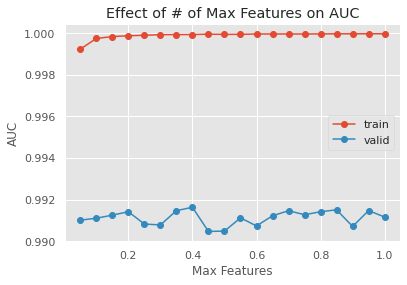

In [55]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('Max Features') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of # of Max Features on AUC') # fill this in
plt.legend()
plt.show()

In [56]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    plt.figure(figsize=(16, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

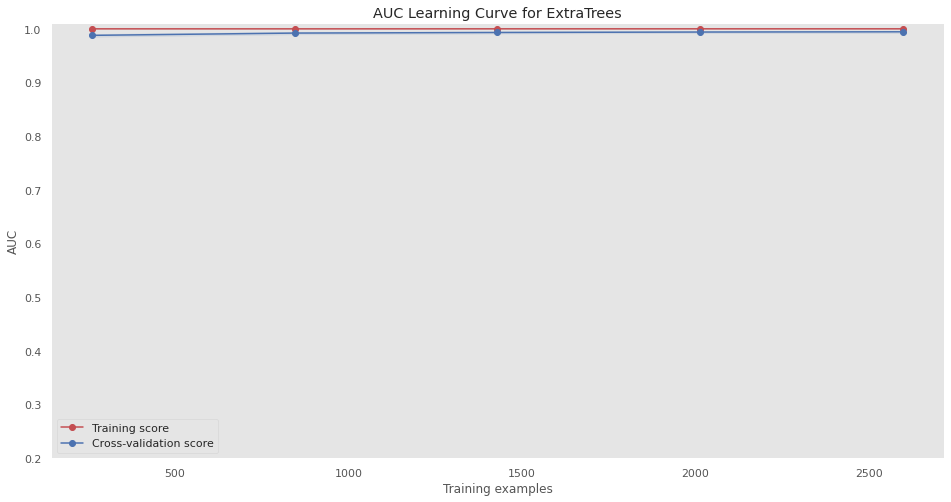

In [57]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = 'AUC Learning Curve for ExtraTrees'                                      # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0, min_samples_leaf=3, min_samples_split=20, n_estimators=100)                                      # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)


plt.show()

In [58]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc.fit(X_train_tf, y_train)

y_train_preds = etc.predict_proba(X_train_tf)[:, 1]
y_valid_preds = etc.predict_proba(X_valid_tf)[:, 1]

print('Extra Trees Classifier')
print('Training:')
etc_train_auc, etc_train_accuracy, etc_train_recall, etc_train_precision, \
etc_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
etc_valid_auc, etc_valid_accuracy, etc_valid_recall, etc_valid_precision, \
etc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Extra Trees Classifier
Training:
AUC:1.000
accuracy:0.997
recall:0.998
precision:0.996
specificity:0.996
prevalence:0.500
 
Validation:
AUC:0.992
accuracy:0.960
recall:0.944
precision:0.864
specificity:0.964
prevalence:0.196
 


In [59]:
feature_importances = pd.DataFrame(etc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [60]:
feature_importances.head()

,importance
X127,0.0
X92,0.0
X110,0.0
X31,0.0
X106,0.0


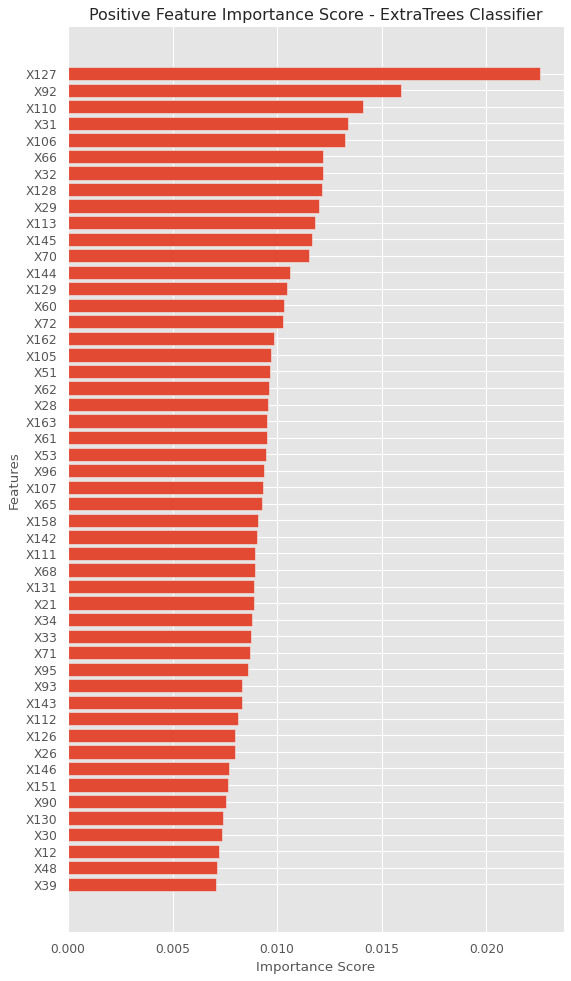

In [61]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


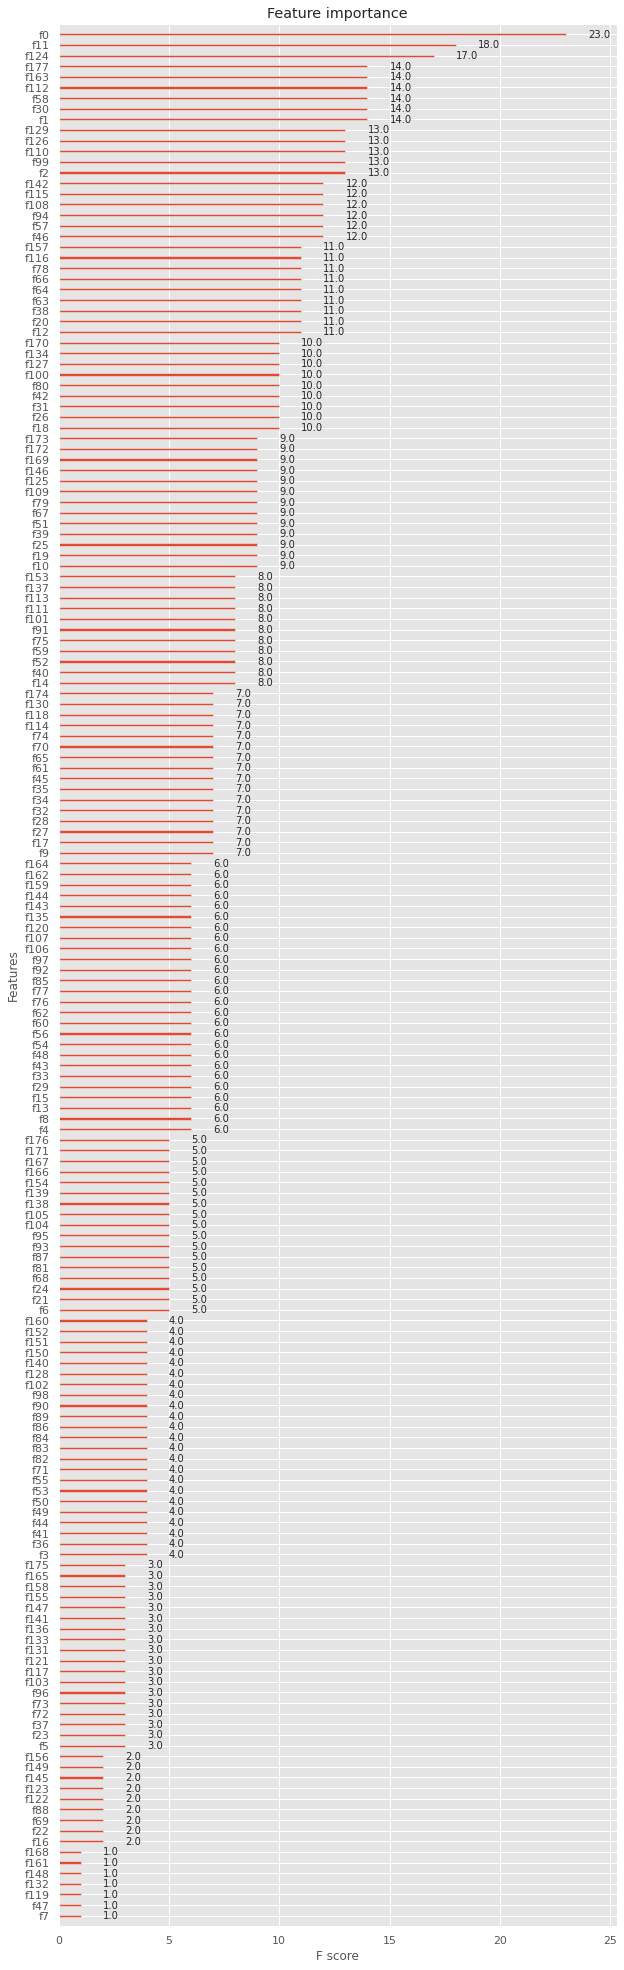

In [62]:
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()
xgbc.fit(X_train_tf, y_train)
ax = xgb.plot_importance(xgbc)
fig = ax.figure
fig.set_size_inches(10, 35)
plt.savefig('xgbcf.png')

In [63]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [67]:
# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [68]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [70]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.993
accuracy:0.956
recall:0.947
precision:0.847
specificity:0.958
prevalence:0.196
 


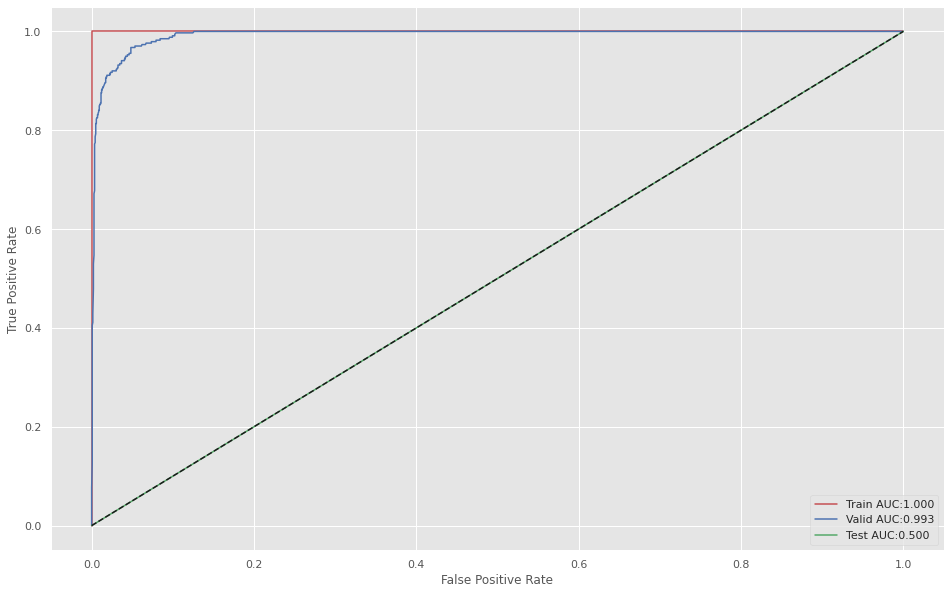

In [71]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()